# Classifying Unpaywall Locations - Sample Analysis Update 

This notebook is a supplement and an update of the result of the last validation found under [Link](https://github.com/subugoe/oa-german-inst). Once again, an additional sample consisting of a hundred DOIs is examined. This time, a revised classification algorithm was used and I will therefore determine its effectiveness in comparison with the previous algorithm.

The structure of this analysis follows the same pattern as last evaluation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
import networkx as nx

In [2]:
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('sample_manual_check_2.csv', sep=';')

In [4]:
df.head()

,upw_doi,oa_category,evidence,host_type,repository_institution,url_for_landing_page,url_for_pdf,evaluation,revision,comment
0,10.1103/physrevd.89.054038,opendoar_subject,oa repository (via OAI-PMH doi match),repository,Cornell University - arXiv,http://arxiv.org/abs/1312.5621,http://arxiv.org/pdf/1312.5621,True,NaN,NaN
1,10.1103/physrevd.89.054038,other_repo,oa repository (semantic scholar lookup),repository,NaN,https://semanticscholar.org/paper/e9195a939f7c...,http://pdfs.semanticscholar.org/46b5/253209f4a...,True,NaN,NaN
2,10.1007/s15010-011-0155-z,not_oa,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
3,10.1051/0004-6361/201118194,other_oa_journal,open (via free pdf),publisher,NaN,https://doi.org/10.1051/0004-6361/201118194,https://www.aanda.org/articles/aa/pdf/2012/04/...,True,NaN,NaN
4,10.1051/0004-6361/201118194,opendoar_subject,oa repository (via OAI-PMH doi match),repository,arXiv.org,http://arxiv.org/abs/1110.0475,http://arxiv.org/pdf/1110.0475,True,NaN,NaN


In [5]:
accuracy_score([1] * len(df.evaluation), df.evaluation)

0.9456521739130435

The accuracy of classifications performed on this dataset has increased by 5% compared to the result of last analysis. Overall, the accuracy is at 95%.

In [6]:
df_false = df[df.evaluation == False]

In [7]:
df_false.groupby(['upw_doi'])['evaluation'].count()

upw_doi
10.1002/mma.3895              2
10.1007/s00205-011-0464-5     1
10.1039/c4nr07378a            2
10.1103/physrevb.83.054109    1
10.2961/jlmn.2014.03.0019     1
10.3390/polym10090935         1
10.3847/2041-8213/aa5fff      2
Name: evaluation, dtype: int64

In [8]:
df_false.describe()

,upw_doi,oa_category,evidence,host_type,repository_institution,url_for_landing_page,url_for_pdf,evaluation,revision,comment
count,10,10,10,10,9,9,10,10,10,9
unique,7,3,2,1,5,9,10,1,5,5
top,10.1039/c4nr07378a,opendoar_other,oa repository (via OAI-PMH doi match),repository,escidoc.org,http://bib-pubdb1.desy.de/search?p=id:%22PUBDB...,http://www.jlps.gr.jp/jlmn/upload/83602e721c8a...,False,opendoar_inst,https://v2.sherpa.ac.uk/id/repository/4170
freq,2,5,7,10,2,1,1,10,4,2


About 5% of the locations have been classified incorrectly, thus the value has decreased by 5% compared to the previous result. Further, 7% of the articles have at least one faulty connection to a location.

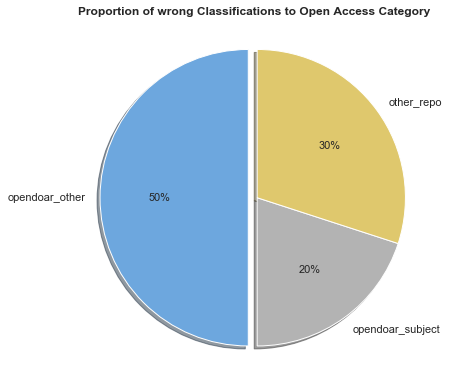

In [9]:
ax = df_false.groupby(['oa_category'])['upw_doi'].count() \
                    .plot.pie(figsize=(6,6), 
                              autopct='%1.0f%%',
                              textprops={'fontsize': 11, 'fontweight': 400},
                              colors=['#6da7de','#b3b3b3','#DFC86D'],
                              shadow=True,
                              startangle=90,
                              explode=(0.06, 0, 0))

ax.axis('equal')
ax.set(ylabel='')

plt.title('Proportion of wrong Classifications to Open Access Category',
          fontdict={'fontsize': 12, 'fontweight': 700}, pad=20, x=0.5)

plt.show()

While a decrease in incorrect `other_repo` classifications can be observed, false recognition of `opendoar_other` has increased compared to the result from the previous analysis. In total, five repositories were classified incorrectly as `opendoar_other`. This time there were no faulty closed access cases, however two articles marked as `not_oa` were available as `free access` on the websites, see [Link](https://onlinelibrary.wiley.com/doi/abs/10.1002/humu.21197).

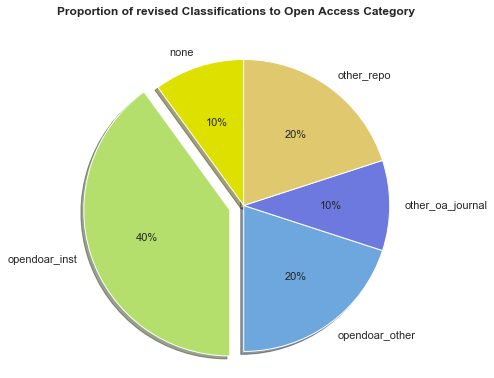

In [10]:
ax = df_false.groupby(['revision'])['upw_doi'].count() \
                .plot.pie(figsize=(6,6), 
                          autopct='%1.0f%%',
                          textprops={'fontsize': 11, 'fontweight': 400},
                          colors=['#DEE000','#B5DF6D','#6da7de', '#6D79DF', '#DFC86D'],
                          shadow=True,
                          explode=(0, 0.1, 0, 0, 0),
                          startangle=90)

plt.title('Proportion of revised Classifications to Open Access Category',
          fontdict={'fontsize': 12, 'fontweight': 700}, pad=30, x=0.5)

ax.axis('equal')
ax.set(ylabel='')

plt.show()

The figure shows that in over a third of the incorrect classifications a connection to institutional repositories has been proved. In one case a DOI led to a deleted document (noted as `none`). Though strictly speaking, the location was classified correctly. In two cases, no evidence to OpenDOAR could be proven. In both cases it was striking that the respective values in `url_for_landing_page` and `url_for_pdf` refer to different domains. The related repository was [CiteSeerX.psu](https://citeseerx.ist.psu.edu/index). Again classification problems arose with this [repository](https://v2.sherpa.ac.uk/id/repository/1874?template=opendoar). The repository was wrongly classified twice as `opendoar_subject` and once correctly as `opendoar_other`. Also the repository [DESY Publication Database](https://v2.sherpa.ac.uk/id/repository/1108), which was already incorrectly classified in the last analysis, was recognized as `other_repo`, but is found in OpenDOAR. The [Aberystwyth Research Portal](https://v2.sherpa.ac.uk/id/repository/4170) respository has been classified as `opendoar_other` in two cases, but is listed as an institutional repository in OpenDOAR. In one case, Unpaywall´s classification of a location was incorrect. Once again, a journal was incorrectly classified as a repository. 

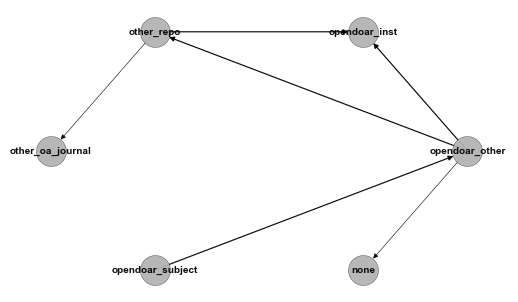

In [11]:
fig = plt.figure(figsize=(7,4))

df_false_edges = df_false.agg(lambda x: tuple([x['oa_category'], x['revision']]), 
                                      axis=1).values

G = nx.DiGraph()
G.add_edges_from(df_false_edges)

for u, v, d in G.edges(data=True):
    weight = list(df_false_edges).count(tuple([u, v]))
    G[u][v]['weight'] = weight
    
edgewidth = [d['weight'] for (u, v, d) in G.edges(data=True)]
edgewidth = [w / np.mean(edgewidth) for w in edgewidth]

pos = nx.circular_layout(G)

nx.draw(G, 
        pos=pos, 
        width=edgewidth, 
        with_labels=True, 
        node_size=900,
        linewidths=0.3,
        alpha=0.95,
        node_color='#b3b3b3',
        font_size=10, 
        font_weight='bold')

ax = plt.gca() 
ax.collections[0].set_edgecolor('black')

plt.show()

Although the results should be viewed with caution, since two entries could possibly be listed in OpenDOAR and a repository that has been classified correctly but contains a deleted entry, an improved classification with respect to the sample was achieved. One can also see that there was no major discrepancy between incorrect classifications among OpenDOAR and non-OpenDOAR classifications.